In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
df = pd.read_csv('csv/new_dataset.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df['job_posted_month_number'] = df['job_posted_date'].dt.month
df = df.drop(columns=df.columns[0])
df.set_index('job_id')

,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month,name,skills,type,job_posted_month_number
job_id,,,,,,,,,,,,,,,,,,,,
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,sql,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,python,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,excel,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,tableau,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,power bi,analyst_tools,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,spark,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,hadoop,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,kafka,libraries,3


In [2]:
df_us = df[df['job_country']=='United States']
df_canada = df[df['job_country']=='Canada']

In [3]:
df_c = df_canada['job_title_short'].value_counts().reset_index(name='total_job')
df_u = df_us['job_title_short'].value_counts().reset_index(name='total_job')
df_c

,job_title_short,total_job
0,Data Engineer,40796
1,Senior Data Engineer,13865
2,Data Scientist,8998
3,Data Analyst,8471
4,Software Engineer,7474
5,Business Analyst,3672
6,Machine Learning Engineer,3399
7,Senior Data Scientist,3044
8,Senior Data Analyst,1840
9,Cloud Engineer,1255


In [4]:
df_count_cnd = df_canada.groupby(['skills', 'job_title_short']).size()
df_count_us = df_us.groupby(['skills', 'job_title_short']).size()
df_count_cnd = df_count_cnd.reset_index(name='skills_count')
df_count_cnd.sort_values(by='skills_count', ascending=False, inplace=True)
df_count_us = df_count_us.reset_index(name='skills_count')
df_count_us.sort_values(by='skills_count', inplace=True, ascending=False)

In [5]:
job_titles_from_canada = df_count_cnd['job_title_short'].unique().tolist()
job_titles_from_canada = sorted(job_titles_from_canada[:3])
job_titles_from_canada

['Data Analyst', 'Data Engineer', 'Senior Data Engineer']

In [6]:
job_titles_from_usa = df_count_us['job_title_short'].unique().tolist()
job_titles_from_usa = sorted(job_titles_from_usa[:3])
job_titles_from_usa

['Data Analyst', 'Data Engineer', 'Data Scientist']

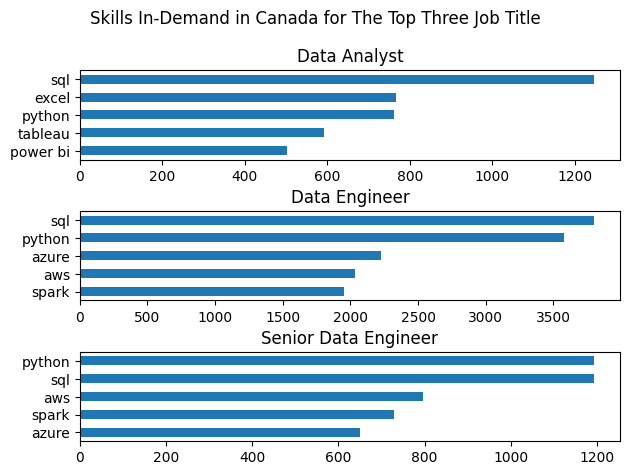

In [7]:
fig, ax = plt.subplots(len(job_titles_from_canada),1)
for i, job_title in enumerate(job_titles_from_canada):
    df_plot_canada = df_count_cnd[df_count_cnd['job_title_short'] == job_title].head(5)
    df_plot_canada.plot(kind='barh', x='skills',y='skills_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
plt.suptitle('Skills In-Demand in Canada for The Top Three Job Title')
fig.tight_layout(h_pad=0.4)

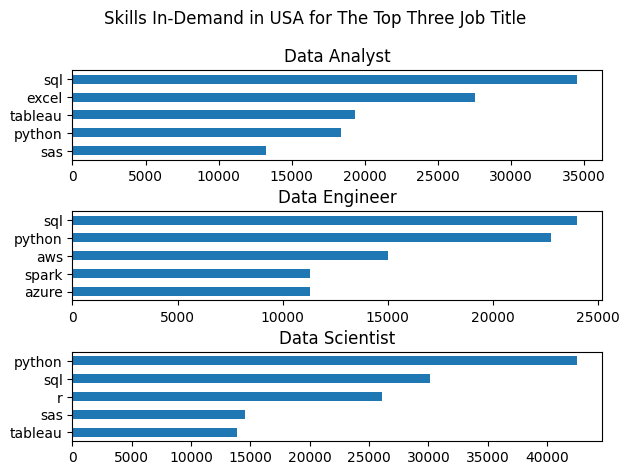

In [8]:
fig, ax = plt.subplots(len(job_titles_from_usa),1)
for i, job_title in enumerate(job_titles_from_usa):
    df_plot_usa = df_count_us[df_count_us['job_title_short'] == job_title].head(5)
    df_plot_usa.plot(kind='barh', x='skills',y='skills_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
plt.suptitle('Skills In-Demand in USA for The Top Three Job Title')
fig.tight_layout(h_pad=0.4)


New Plot using Percentages

In [9]:
df_canada_percent = pd.merge(df_count_cnd, df_c, on='job_title_short', how='left')
df_usa_percent = pd.merge(df_count_us, df_u, how='left', on='job_title_short')
df_canada_percent['skills_in_percent'] = 100 * df_canada_percent['skills_count']/df_canada_percent['total_job']
df_usa_percent['skills_in_percent'] = 100 * df_usa_percent['skills_count']/df_usa_percent['total_job']
df_canada_percent

,skills,job_title_short,skills_count,total_job,skills_in_percent
0,sql,Data Engineer,3803,40796,9.321992
1,python,Data Engineer,3576,40796,8.765565
2,azure,Data Engineer,2226,40796,5.456417
3,aws,Data Engineer,2035,40796,4.988234
4,spark,Data Engineer,1950,40796,4.779880
...,...,...,...,...,...
1482,centos,Cloud Engineer,1,1255,0.079681
1483,cassandra,Senior Data Analyst,1,1840,0.054348
1484,capacitor,Machine Learning Engineer,1,3399,0.029420
1485,hugging face,Senior Data Engineer,1,13865,0.007212


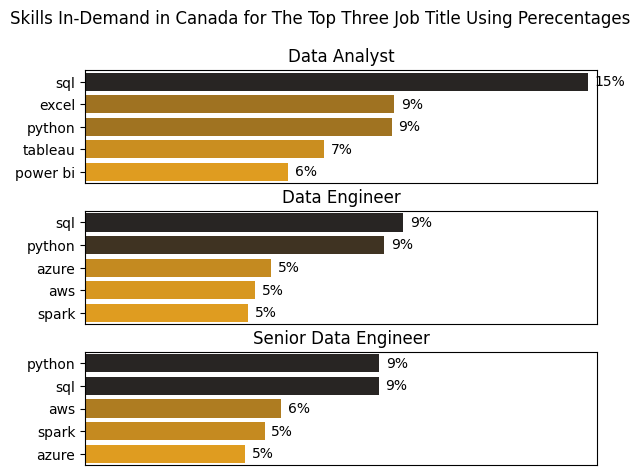

In [10]:
fig, ax = plt.subplots(len(job_titles_from_canada),1)
for i, job_title in enumerate(job_titles_from_canada):
    df_plot_canada = df_canada_percent[df_canada_percent['job_title_short'] == job_title].head(5)
    sbn.barplot(df_plot_canada, x='skills_in_percent',y='skills', ax=ax[i], hue='skills_count', palette='dark:orange_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,15)
    
    for index, value in enumerate(df_plot_canada['skills_in_percent']):
        ax[i].text(value+0.2, index, f'{value:.0f}%', va='center')
    ax[i].set_xticks([])

plt.suptitle('Skills In-Demand in Canada for The Top Three Job Title Using Perecentages')
fig.tight_layout(h_pad=0.4)

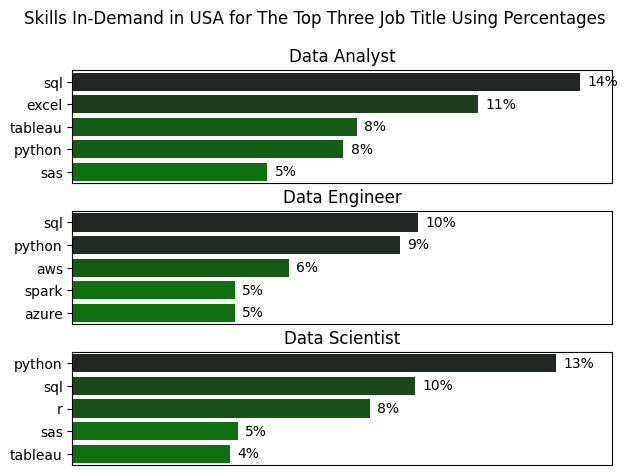

In [11]:
fig, ax = plt.subplots(len(job_titles_from_usa),1)
for i, job_title in enumerate(job_titles_from_usa):
    df_plot_usa = df_usa_percent[df_usa_percent['job_title_short'] == job_title].head(5)
    # df_plot_usa.plot(kind='barh', x='skills',y='skills_in_percent', ax=ax[i], title=job_title)
    sbn.barplot(df_plot_usa, x='skills_in_percent',y='skills', ax=ax[i], hue='skills_count', palette='dark:green_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,15)
    
    for index, value in enumerate(df_plot_usa['skills_in_percent']):
        ax[i].text(value+0.2, index, f'{value:.0f}%', va='center')
    ax[i].set_xticks([])
plt.suptitle('Skills In-Demand in USA for The Top Three Job Title Using Percentages')
fig.tight_layout(h_pad=0.4)